In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd1 = pd.read_csv('magf_10x8_pg0725_5969.csv', sep='   ')
pd2 = pd.read_csv('magf_10x8_pg0726_6007.csv', sep='   ')
combined_data = pd.concat([pd1, pd2], axis=0)
combined_data

/tmp/ipykernel_1875237/363930499.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  pd1 = pd.read_csv('magf_10x8_pg0725_5969.csv', sep='   ')
/tmp/ipykernel_1875237/363930499.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  pd2 = pd.read_csv('magf_10x8_pg0726_6007.csv', sep='   ')


,J,CT,CP,eta
0,0.096,0.1195,0.0583,0.197
1,0.121,0.1190,0.0590,0.244
2,0.143,0.1180,0.0595,0.284
3,0.167,0.1171,0.0601,0.326
4,0.191,0.1162,0.0607,0.365
5,0.217,0.1150,0.0614,0.407
6,0.241,0.1132,0.0617,0.442
7,0.266,0.1111,0.0621,0.476
8,0.291,0.1093,0.0625,0.508
9,0.311,0.1068,0.0624,0.533


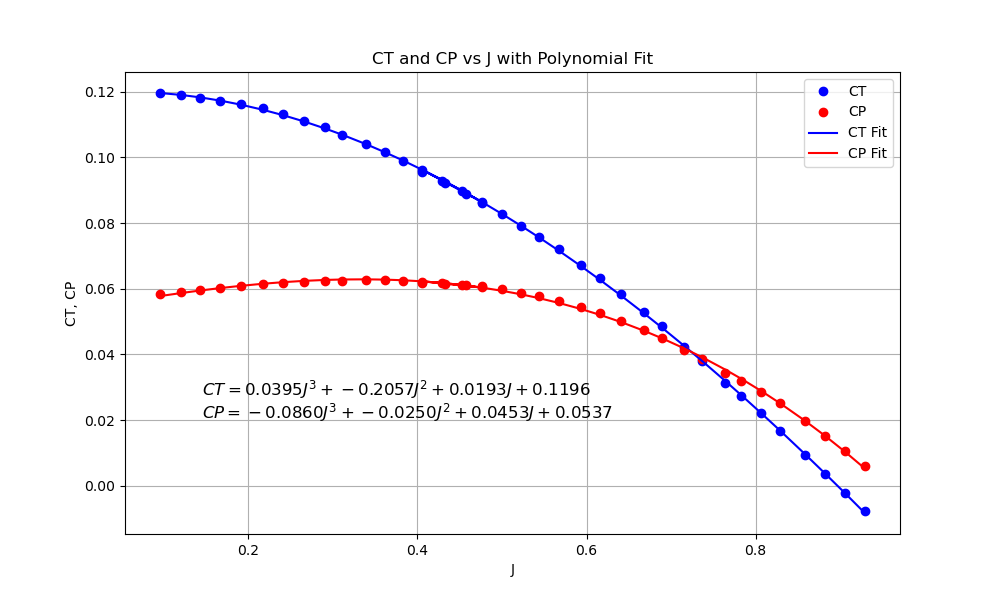

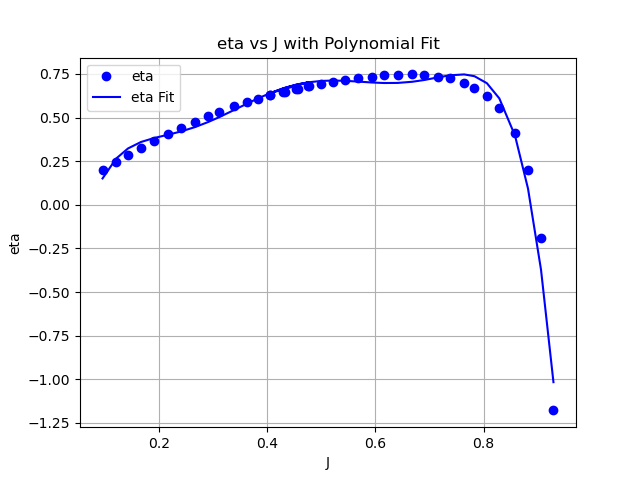

In [3]:
%matplotlib widget
J = combined_data['J']
CT = combined_data['CT']
CP = combined_data['CP']
eta = combined_data['eta']
# Polynomial fit for CT vs J
ct_fit = np.polyfit(J, CT, 3)
ct_curve = np.polyval(ct_fit, J)

# Polynomial fit for CP vs J
cp_fit = np.polyfit(J, CP, 3)
cp_curve = np.polyval(cp_fit, J)

#Polynomial fit for eta vs J
eta_fit = np.polyfit(J, eta, 6)
eta_curve = np.polyval(eta_fit, J)

# Plotting CT and CP vs J
plt.figure(figsize=(10, 6))
plt.plot(J, CT, 'bo', label='CT')
plt.plot(J, CP, 'ro', label='CP')
plt.plot(J, ct_curve, 'b-', label='CT Fit')
plt.plot(J, cp_curve, 'r-', label='CP Fit')
plt.xlabel('J')
plt.ylabel('CT, CP')
plt.legend()
plt.title('CT and CP vs J with Polynomial Fit')
plt.grid(True)

# Add text annotations for the fitted equations
ct_eq = f'$CT = {ct_fit[0]:.4f}J^3 + {ct_fit[1]:.4f}J^2 + {ct_fit[2]:.4f}J + {ct_fit[3]:.4f}$'
cp_eq = f'$CP = {cp_fit[0]:.4f}J^3 + {cp_fit[1]:.4f}J^2 + {cp_fit[2]:.4f}J + {cp_fit[3]:.4f}$'
plt.text(0.1, 0.3, ct_eq, transform=plt.gca().transAxes, fontsize=12)
plt.text(0.1, 0.25, cp_eq, transform=plt.gca().transAxes, fontsize=12)

plt.show()

fig = plt.figure()
plt.plot(J, eta, 'bo', label='eta')
plt.plot(J, eta_curve, 'b-', label='eta Fit')
plt.xlabel('J')
plt.ylabel('eta')
plt.legend()
plt.title('eta vs J with Polynomial Fit')
plt.grid(True)
plt.show()

In [ ]:
twice_min_thrsut_speed*60/(np.linspace(0.35, 0.9, 100)*D)

In [ ]:
np.polyval(ct_fit, np.arange(0.05, 0.95, 0.01))

In [ ]:
%matplotlib widget
stall_speed = 6.36 #m/s
min_thrust_speed = 9.72 #m/s
twice_min_thrsut_speed = 2*min_thrust_speed
D = 10*0.0254 #m
rho = 1.225 #kg/m^3
J = np.arange(0.15, 2.95, 0.01)
speeds = np.array([stall_speed, min_thrust_speed, twice_min_thrsut_speed])
rpms  = np.zeros((3, len(J)))
thrusts = np.zeros_like(rpms)
powers = np.zeros_like(rpms)
for i, speed in enumerate(speeds):
    """J  = V/nD"""
    n = speed/(J*D)
    rpms[i] = n*60
    thrusts[i] = (np.polyval(ct_fit, J)*rho*(n**2)*(D**4))*1000/9.81
    powers[i] = (np.polyval(cp_fit, J)*rho*(n**3)*(D**5))


fig, axs = plt.subplots(2, 1, figsize=(5, 6))

# Plot thrust
axs[0].plot(rpms[0], thrusts[0], c='red',  marker = '.',  label='Speed: 6.36 m/s')
axs[0].plot(rpms[1], thrusts[1], c='blue', marker = '.', label='Speed: 9.72 m/s')
axs[0].plot(rpms[2], thrusts[2], c='green',marker = '.', label='Speed: 19.44 m/s')
axs[0].set_xlabel('RPM')
axs[0].set_ylabel('Thrust (grams)')
axs[0].legend()
axs[0].set_title('Thrust vs RPM')
axs[0].set_xlim(0, 6000)
axs[0].set_ylim(-600, 1000)

# Plot powers
axs[1].plot(rpms[0], powers[0], c='red',  marker = '.', label='Speed: 6.36 m/s')
axs[1].plot(rpms[1], powers[1], c='blue', marker = '.', label='Speed: 9.72 m/s')
axs[1].plot(rpms[2], powers[2], c='green',marker = '.', label='Speed: 19.44 m/s')
axs[1].set_xlabel('RPM')
axs[1].set_ylabel('Power (Watts)')
axs[1].legend()
axs[1].set_title('Power vs RPM')
axs[1].set_xlim(0, 6000)
axs[1].set_ylim(-100, 150)

plt.tight_layout()
plt.savefig('thrust_power_vs_rpm.png')
plt.show()

In [ ]:
K = 0.0042 #Nm/A
i0= 0.6
Rm = 0.25
motor_rpms = np.linspace(0, 6000, 100)*3 #3 is for the gear ratio
motor_speed = motor_rpms*2*np.pi/60 #convert to rad/s
es = np.array([8.4, 6])


Powers = np.zeros((2, len(motor_speed)))
Powers[0] = (K*es[0]/Rm - K*i0)*motor_speed - K**2/Rm*motor_speed**2
Powers[1] = (K*es[1]/Rm - K*i0)*motor_speed - K**2/Rm*motor_speed**2

In [ ]:
fig = plt.figure(figsize=(5, 6))
plt.plot(rpms[0], powers[0], c='red',  marker = '.', label='Speed: 6.36 m/s')
plt.plot(rpms[1], powers[1], c='blue', marker = '.', label='Speed: 9.72 m/s')
plt.plot(rpms[2], powers[2], c='green',marker = '.', label='Speed: 19.44 m/s')
plt.plot(motor_speed*60/(2*np.pi*3), Powers[0], c='red', label='Motor Power @ Voltage: 8.4V')
plt.plot(motor_speed*60/(2*np.pi*3), Powers[1], c='blue', label='Motor Power @Voltage: 6V') 
plt.xlim(0, 6000)
plt.ylim(-100, 100)
plt.legend()
plt.xlabel('Prop Speed (RPM)')
plt.ylabel('Power (Watts)')
plt.title('Motor Power vs RPM')
plt.savefig('motor_power_vs_rpm.png')
plt.show()

In [ ]:
from scipy.optimize import fsolve
W = 0.75*9.81
Sw = 0.198769
CD0 = 0.05843
K = 0.13986
Km = 0.0042
v = np.linspace(6, 14.6, 100)
voltage = np.zeros_like(v)
current = np.zeros_like(v)
rpms = np.zeros_like(v)
motor_power = np.zeros_like(v)
electrical_power = np.zeros_like(v)
required_power = np.zeros_like(v)
motor_efficiency = np.zeros_like(v)
prop_efficiency = np.zeros_like(v)
total_efficiency = np.zeros_like(v)
max_climb_rate = np.zeros_like(v)
rho = 1.225
thrust = (CD0+K*(0.75*9.81/(0.5*Sw*rho*v**2))**2)*0.5*Sw*rho*v**2


for idx, velocity in enumerate(v):
    prop_thrust = lambda n: (np.polyval(ct_fit, velocity/(n*D))*rho*(n**2)*D**4)
    n = fsolve(lambda n: prop_thrust(n) - thrust[idx], 3800/60)
    prop_power = np.polyval(cp_fit, velocity/(n*D))[0]*rho*(n[0]**3)*D**5
    rpms[idx] = n[0]*60
    omega = n[0]*2*np.pi
    omega *= 3 #Gear ratio
    motor_torque = prop_power/(omega)
    Q0 = Km/i0
    current[idx] = (motor_torque+Q0)/Km
    voltage[idx] = current[idx]*Rm + Km*omega
    electrical_power[idx] = voltage[idx]*current[idx]
    motor_power[idx] = Km*(current[idx]-i0)*omega
    
    motor_efficiency[idx] = motor_power[idx]/electrical_power[idx]
    required_power[idx] = thrust[idx]*velocity
    prop_efficiency[idx] = required_power[idx]/motor_power[idx]
    total_efficiency[idx] = motor_efficiency[idx]*prop_efficiency[idx]
    eta = np.polyval(eta_fit, velocity/(n*D))[0]
    #max climb rate calculation from https://webstor.srmist.edu.in/web_assets/srm_mainsite/files/downloads/class12-2012.pdf
    max_climb_rate[idx] = eta*prop_power/W - \
                        ((2*0.75*9.81/(1.225*0.198769))*(K/(3*CD0))**0.5)**0.5 * \
                        1.155/(0.5*(np.pi*0.9*7.16992/CD0)**0.5) #Denominator is L/D max
    # print(f'idx:{idx:3d}, velocity: {velocity:.2f}, v: {v[idx]:.2f}, \
    #       thrust: {thrust[idx]:.2f}, prop_thrust: {prop_thrust(n)[0]:.2f}, \
    #       n: {n[0]:.2f}, n*60: {n[0]*60:.2f}, omega: {omega:.2f}, \
    #       prop_power: {prop_power:.2f}, motor_Q: {motor_torque:.4f}, Q0: {Q0},current: {current[idx]:.2f}, voltage: {voltage[idx]:.2f},\
    #       electrical_power: {electrical_power[idx]:.2f}, motor_power: {motor_power[idx]:.2f},\
    #       required_power: {required_power[idx]:.2f}, motor_efficiency: {motor_efficiency[idx]:.2f},\
    #       prop_efficiency: {prop_efficiency[idx]:.2f} pe: {np.polyval(eta_fit, velocity/(n*D))[0]:.2f}, total_efficiency: {total_efficiency[idx]:.4f}, tf: {(required_power[idx]/electrical_power[idx]):.4f}')

In [ ]:
fig = plt.figure(figsize=(6,5))
plt.plot(v, rpms, c='red',  marker = '.', label='RPM')
plt.xlabel('Velocity (m/s)')
plt.ylabel('RPM')
plt.title('RPM vs Velocity')
plt.savefig('rpm_vs_velocity.png')
plt.show()

fig = plt.figure(figsize=(6,5))
plt.plot(v, voltage*100/8.4, c='red',  marker = '.', label='Throttle')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Throttle %')
plt.title('Throttle vs Velocity')
plt.savefig('throttle_vs_velocity.png')
plt.show()

fig = plt.figure(figsize=(6,5))
plt.plot(v, current, c='red',  marker = '.', label='Current')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Current (A)')
plt.title('Current vs Velocity')
plt.savefig('current_vs_velocity.png')
plt.show()

fig = plt.figure(figsize=(6,5))
plt.plot(v, motor_power, c='red',  marker = '.', label='Motor Power')
plt.plot(v, required_power, c='blue',  marker = '.', label='Required Power')
plt.plot(v, electrical_power, c='green',  marker = '.', label='Electrical Power')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Power (Watts)')
plt.title('Power vs Velocity')
plt.legend()
plt.savefig('power_vs_velocity.png')
plt.show()

fig = plt.figure(figsize=(6,5))
plt.plot(v, motor_efficiency, c='red',  marker = '.', label='Motor Efficiency')
plt.plot(v, prop_efficiency, c='blue',  marker = '.', label='Prop Efficiency')
plt.plot(v, total_efficiency, c='green',  marker = '.', label='Total Efficiency')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Efficiency')
plt.title('Efficiency vs Velocity')
plt.legend()
plt.savefig('efficiency_vs_velocity.png')
plt.show()

fig = plt.figure(figsize=(6,5))
plt.plot(v, max_climb_rate*60, c='red',  marker = '.', label='Max Climb Rate')
plt.xlabel('Velocity (m/s)')
plt.ylabel('Max Climb Rate (m/min)')
plt.title('Max Climb Rate vs Velocity')
plt.legend()
plt.savefig('max_climb_rate_vs_velocity.png')
plt.show()

In [ ]:
tall_speed = 6.36 #m/s
min_thrust_speed = 9.72 #m/s
twice_min_thrsut_speed = 2*min_thrust_speed
D = 10*0.0254 #m
rho = 1.225 #kg/m^3
J = np.arange(0.15, 2.95, 0.01)
speeds = np.array([stall_speed, min_thrust_speed, twice_min_thrsut_speed])
rpms  = np.zeros((3, len(J)))
thrusts = np.zeros_like(rpms)
powers = np.zeros_like(rpms)
for i, speed in enumerate(speeds):
    """J  = V/nD"""
    n = speed/(J*D)
    rpms[i] = n*60
    thrusts[i] = (np.polyval(ct_fit, J)*rho*(n**2)*(D**4))*1000/9.81
    powers[i] = (np.polyval(cp_fit, J)*rho*(n**3)*(D**5))


w = np.linspace(0, (8.4-0.6*Rm)/Km, 100)
i = (8.4-Km*w)/Rm
mechanical_power = Km*((8.4-Km*w-i0*Rm)/Rm)*w
ep = np.ones_like(w)*8.4*i

fig, ax1 = plt.subplots(figsize=(6,5))

# plot mechanical power
ax1.plot(w*60/3, mechanical_power*100/ep, c='gray', marker='.', label='Mechanical Efficiency')
ax1.vlines(2960, 7.25, 100, color='firebrick', linestyle='dashed', label='Max Efficiency RPM')
ax1.hlines(7.25, 0, 6000, color='firebrick', linestyle='dashed')
ax1.text(6000, 7.25, 'Efficiency w/o gearbox = 7.25%', color = 'firebrick', fontsize=8, ha='left')
ax1.vlines(8411, 20.55, 100, color='seagreen', linestyle='dashed', label='Max Efficiency RPM')
ax1.hlines(20.55, 0, 11000, color='seagreen', linestyle='dashed')
ax1.text(11000, 20.55, 'Efficiency with gearbox = 20.55%', color = 'seagreen', fontsize=8, ha='left')
ax1.set_xlabel('Motor RPM')
ax1.set_ylabel('Motor Efficiency (%)')
ax1.set_xlim(-10, 41000)

# create a twin axis for ep curve
ax2 = ax1.twinx()
ax2.plot(w*60/3, ep, c='blue', label='Electrical Power (Watts)')
# ax2.plot(rpms[0], powers[0], c='red',  marker = '.', label='Speed: 6.36 m/s')
ax2.plot(rpms[1], powers[1], c='seagreen', marker = '.', label='Prop power with Gear Ratio: 3')


# ax2.plot(rpms[0]/3, powers[0], c='red',  marker = '.', label='Speed: 6.36 m/s')
ax2.plot(rpms[1]/3, powers[1], c='firebrick', marker = '.', label='Prop power with Gear Ratio: 1')

ax2.set_ylabel('Electrical Power (Watts)')
ax2.set_ylim(0, 300)
# display legend
plt.legend()

# display the plot
plt.savefig('motor_efficiency_vs_rpm.png')
plt.show()
